In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data= pd.read_csv('/content/drive/MyDrive/ML CSV/cancer.csv')
data.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1, inplace=True) # Removing the data columns which need to drop as per assignment.

Cluster Counts:
{0.0: 569}


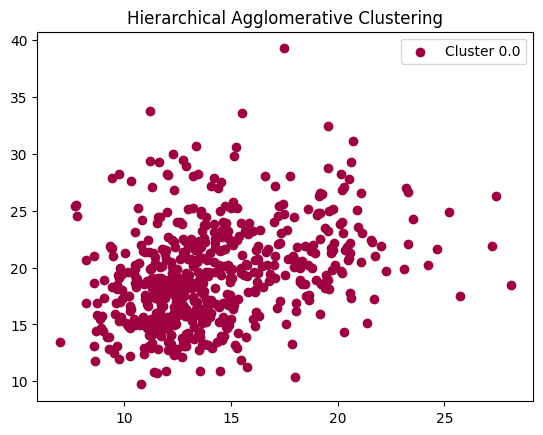

In [5]:
# Read the CSV file

# Define a custom function to calculate the distance between two clusters (single linkage)
def cluster_distance(cluster1, cluster2):
    min_distance = float('inf')
    for point1 in cluster1:
        for point2 in cluster2:
            distance = np.linalg.norm(point1 - point2)
            min_distance = min(min_distance, distance)
    return min_distance

# Initialize each data point as its own cluster
clusters = [[point] for point in data.values]

# Perform hierarchical agglomerative clustering
while len(clusters) > 1:
    min_distance = float('inf')
    merge_clusters = None

    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            distance = cluster_distance(clusters[i], clusters[j])
            if distance < min_distance:
                min_distance = distance
                merge_clusters = (i, j)

    i, j = merge_clusters
    clusters[i].extend(clusters[j])
    del clusters[j]

# Assign cluster labels to data points
cluster_labels = np.zeros(len(data))
for label, cluster in enumerate(clusters):
    for point in cluster:
        index = np.where((data.values == point).all(axis=1))[0][0]
        cluster_labels[index] = label

# Count the number of points in each cluster
unique_labels = np.unique(cluster_labels)
cluster_counts = {label: np.sum(cluster_labels == label) for label in unique_labels}
print("Cluster Counts:")
print(cluster_counts)

# Scatter plot the clustered data
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    cluster = data[cluster_labels == label]
    plt.scatter(cluster.iloc[:, 0], cluster.iloc[:, 1], color=color, label=f'Cluster {label}')

plt.title('Hierarchical Agglomerative Clustering')
plt.legend()
plt.show()